In [1]:
%matplotlib notebook
# use ``%matplotlib widget`` in Jupyter Lab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
import pathlib
import os
import pwd

def get_home():
    return os.path.expanduser("~")
home = get_home()

run_dir  = pathlib.Path(rf"{home}/LEC/") #path to your DataN

print(f"run_dir: {run_dir}")

run_dir: /home/ong/LEC


In [2]:
import matplotlib as mpl
import figformat 
fig_width,fig_height,params=figformat.figure_format(fig_width=3.4,fig_height=2)
mpl.rcParams.update(params)

# Visualizing examples in Data3 and Data4
##### Time evolution of electron bunch energy

<IPython.core.display.Javascript object>


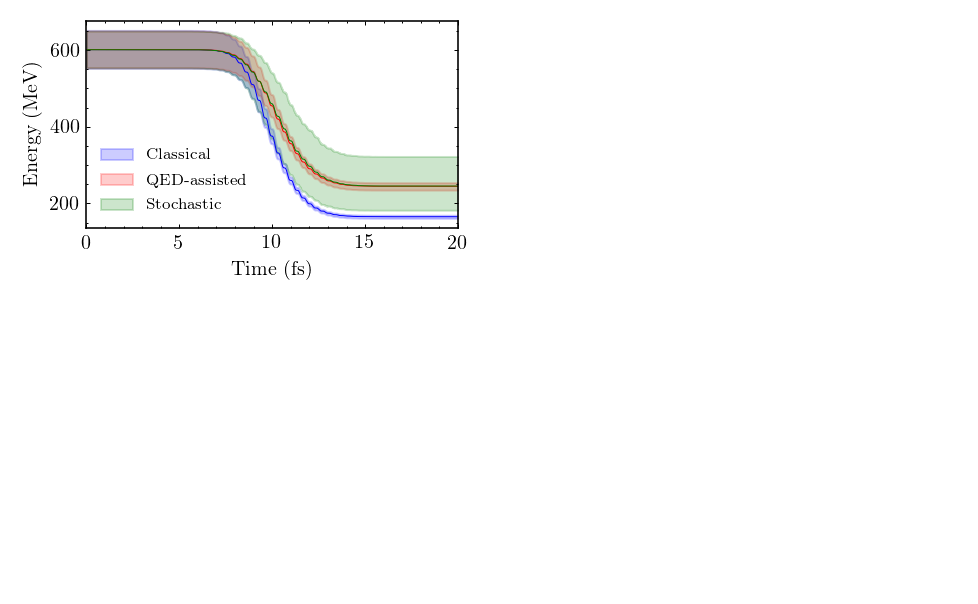

In [6]:
file1 = 3
file2 = 4
file3 = 15
#Time evolution of electron energy
T1,E1,sig_max1,sig_min1 = np.loadtxt(rf"{run_dir}/examples/Data3/AveEne"
                                     +str(file1).zfill(3)+".dat"
                                     ,unpack=True,usecols=[0,1,2,3]
                                     ,dtype=np.float)
T2,E2,sig_max2,sig_min2 = np.loadtxt(rf"{run_dir}/examples/Data4/AveEne"
                                     +str(file2).zfill(3)+".dat"
                                     ,unpack=True,usecols=[0,1,2,3]
                                     ,dtype=np.float)
T3,E3,sig_max3,sig_min3 = np.loadtxt(rf"{run_dir}/examples/Data_test/AveEne"
                                     +str(file3).zfill(3)+".dat"
                                     ,unpack=True,usecols=[0,1,2,3]
                                     ,dtype=np.float)
T1 = T1*1e15 + 11
T2 = T2*1e15 + 11
T3 = T3*1e15 + 11
E1 = E1*1e-6
E2 = E2*1e-6
E3 = E3*1e-6
sig_max1 = sig_max1*1e-6
sig_max2 = sig_max2*1e-6
sig_max3 = sig_max3*1e-6
sig_min1 = sig_min1*1e-6
sig_min2 = sig_min2*1e-6
sig_min3 = sig_min3*1e-6
#############FIG#####################
fig, ax1 = plt.subplots()
ax1.plot(T1,E1,color='blue')
ax1.fill_between(T1,sig_max1,sig_min1,color='blue'
                 ,alpha=0.2,label=r"Classical")
ax1.plot(T2,E2,color='red')
ax1.fill_between(T2,sig_max2,sig_min2,color='red'
                 ,alpha=0.2,label=r"QED-assisted")
ax1.plot(T3,E3,color='green')
ax1.fill_between(T3,sig_max3,sig_min3,color='green'
                 ,alpha=0.2,label=r"Stochastic")

ax1.set_xlim(xmin=0,xmax=20)
ax1.set_xlabel("Time (fs)")
ax1.set_ylabel("Energy (MeV)")
ax1.minorticks_on()
ax1.legend(loc=3,fontsize=8)
fig = plt.gcf()
fig.set_size_inches(fig_width,fig_width/1.618)
fig.tight_layout()

In [7]:
fig.savefig(rf"{run_dir}/docs/source/figures/energies_beam.png"
            ,format='png',dpi=600,transparent=True, bbox_inches='tight')
#fig.savefig(rf"{home}/Downloads/energies.png"
#            ,format='png',dpi=600,transparent=False
#            ,bbox_inches='tight')

##### Electron energy distribution

<IPython.core.display.Javascript object>


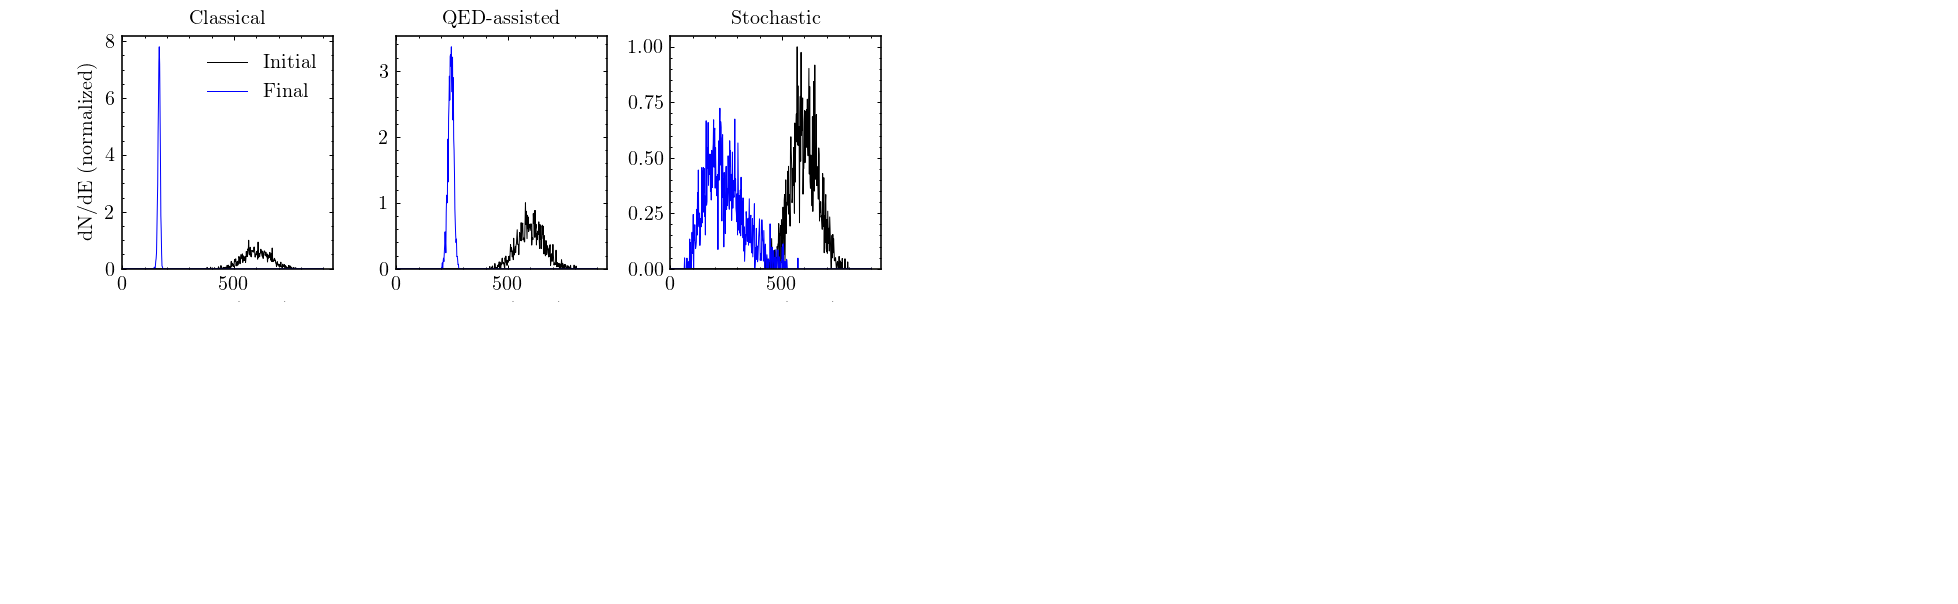

/home/ong/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


In [10]:
file1 = 3
file2 = 4
file3 = 15
gs = gridspec.GridSpec(1,3, wspace= 0.3)
#############CLASSICAL#####################
E0,dist_fn0 = np.loadtxt(rf"{run_dir}/examples/Data3/dist_fn0000"
                         +str(file1).zfill(4)+".dat"
                         ,unpack=True,usecols=[0,1],dtype=np.float)
E1,dist_fn1 = np.loadtxt(rf"{run_dir}/examples/Data3/dist_fn0010"
                         +str(file1).zfill(4)+".dat"
                         ,unpack=True,usecols=[0,1],dtype=np.float)
E0 = E0*1e-6
E1 = E1*1e-6
dist_fn0max = np.max(dist_fn0)
ax1= plt.subplot(gs[0,0])
ax1.plot(E0,dist_fn0/dist_fn0max,color='black',label=r'Initial')
ax1.plot(E1,dist_fn1/dist_fn0max,color='blue',label=r'Final')
ax1.set_xlim(xmin=0)
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Energy (MeV)")
ax1.set_ylabel("dN/dE (normalized)")
ax1.minorticks_on()
ax1.legend()
ax1.set_title(r'Classical')
#############QED-assisted#####################
ax1= plt.subplot(gs[0,1])

E0,dist_fn0 = np.loadtxt(rf"{run_dir}/examples/Data4/dist_fn0000"
                         +str(file2).zfill(4)+".dat"
                           ,unpack=True,usecols=[0,1],dtype=np.float)
E1,dist_fn1 = np.loadtxt(rf"{run_dir}/examples/Data4/dist_fn0010"
                         +str(file2).zfill(4)+".dat"
                         ,unpack=True,usecols=[0,1],dtype=np.float)
E0 = E0*1e-6
E1 = E1*1e-6
dist_fn0max = np.max(dist_fn0)
ax1.plot(E0,dist_fn0/dist_fn0max,color='black')
ax1.plot(E1,dist_fn1/dist_fn0max,color='blue')
ax1.set_xlim(xmin=0)
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Energy (MeV)")
ax1.minorticks_on()
ax1.set_title(r'QED-assisted')
#############STOCHASTIC#####################
ax1= plt.subplot(gs[0,2])

E0,dist_fn0 = np.loadtxt(rf"{run_dir}/examples/Data_test/dist_fn0000"
                         +str(file3).zfill(4)+".dat"
                           ,unpack=True,usecols=[0,1],dtype=np.float)
E1,dist_fn1 = np.loadtxt(rf"{run_dir}/examples/Data_test/dist_fn0010"
                         +str(file3).zfill(4)+".dat"
                         ,unpack=True,usecols=[0,1],dtype=np.float)
E0 = E0*1e-6
E1 = E1*1e-6
dist_fn0max = np.max(dist_fn0)
ax1.plot(E0,dist_fn0/dist_fn0max,color='black')
ax1.plot(E1,dist_fn1/dist_fn0max,color='blue')
ax1.set_xlim(xmin=0)
ax1.set_ylim(ymin=0)
ax1.set_xlabel("Energy (MeV)")
ax1.minorticks_on()
ax1.set_title(r'Stochastic')

fig = plt.gcf()
fig.set_size_inches(fig_width*2, fig_width/1.618)
fig.tight_layout()
plt.show()

In [12]:
fig.savefig(rf"{run_dir}/docs/source/figures/dist_function.png"
            ,format='png',dpi=600,transparent=True, bbox_inches='tight')
plt.close()

##### Photon number distribution

<IPython.core.display.Javascript object>


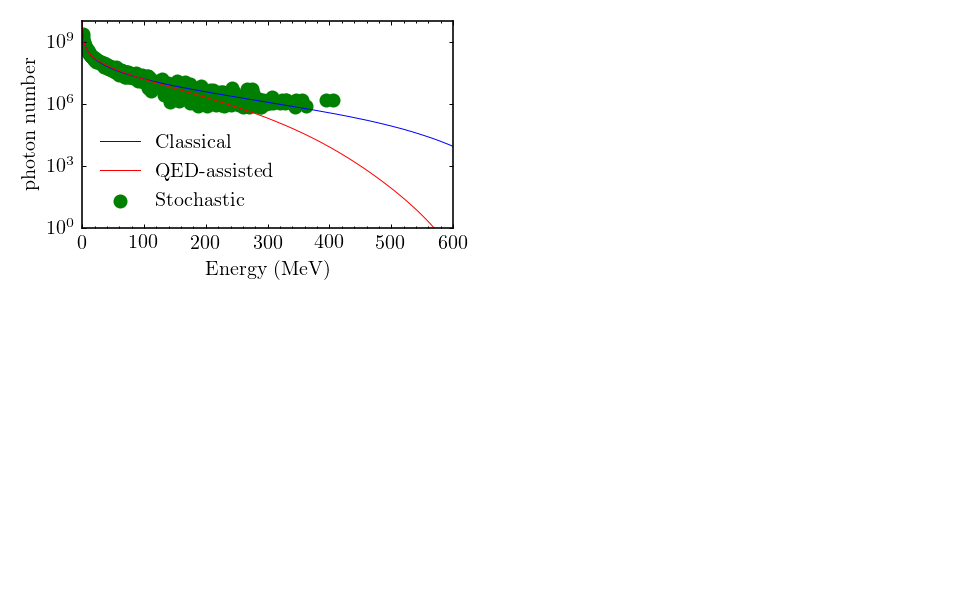

In [9]:
fig, ax1 = plt.subplots()

file1 = 3
file2 = 4
file3 = 5
ENE1,NUM1 = np.loadtxt(rf"{run_dir}/examples/Data3/phtne"
                       +str(file1).zfill(3)+".dat"
                       ,unpack=True,usecols=[0,1],dtype=np.float)
ENE2,NUM2 = np.loadtxt(rf"{run_dir}/examples/Data4/phtne"
                       +str(file2).zfill(3)+".dat"
                       ,unpack=True,usecols=[0,1],dtype=np.float)
ENE3,NUM3 = np.loadtxt(rf"{run_dir}/examples/Data5/dist_ph"
                       +str(file3).zfill(4)+".dat"
                       ,unpack=True,usecols=[0,1],dtype=np.float)
ENE1 = ENE1*1e-6
ENE2 = ENE2*1e-6
ENE3 = ENE3*1e-6
ax1.scatter(ENE3,NUM3,color='green',label=r'Stochastic')
ax1.plot(ENE1,NUM1,color='blue',label='Classical')
ax1.plot(ENE2,NUM2,color='red',label=r'QED-assisted')

ax1.set_xlabel("Energy (MeV)")
ax1.set_ylabel(r"$\mathrm{photon~number}$")
ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_xlim(xmin=0,xmax=600)
ax1.set_ylim(ymin=1,ymax=1e10)
ax1.minorticks_on()
ax1.legend()
fig = plt.gcf()
fig.set_size_inches(fig_width,fig_width/1.618)
fig.tight_layout()
plt.show()

In [ ]:
fig.savefig(rf"{run_dir}/docs/source/figures/photonnumber_beam.png"
            ,format='png',dpi=600,transparent=True
            ,bbox_inches='tight')

# Produce pair

<IPython.core.display.Javascript object>


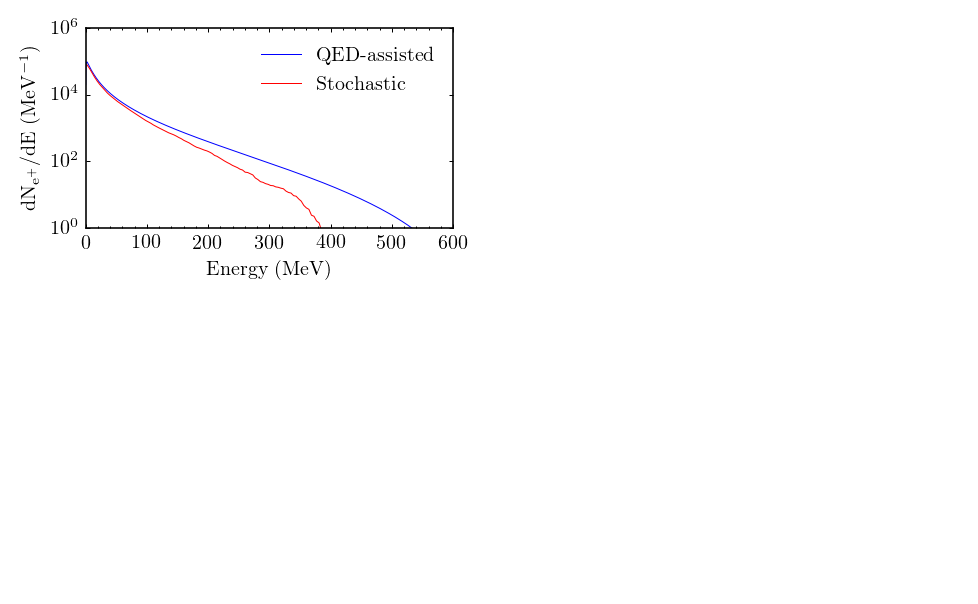

In [143]:

fig, ax1 = plt.subplots()
file1 = 6
file2 = 10
ENE1,NUM1 = np.loadtxt(rf"{run_dir}/examples/Data6/pairTT"
                      +str(file1).zfill(3)+".dat"
                      ,unpack=True,usecols=[0,1],dtype=np.float)
ENE2,NUM2 = np.loadtxt(rf"{run_dir}/examples/Data_test/pairTT"
                      +str(file2).zfill(3)+".dat"
                      ,unpack=True,usecols=[0,1],dtype=np.float)
ENE1 = ENE1*1e-6
ENE2 = ENE2*1e-6
ax1.plot(ENE1,NUM1,color='blue',label='QED-assisted')
ax1.plot(ENE2,NUM2,color='red',label='Stochastic')
ax1.set_xlabel("Energy (MeV)")
ax1.set_ylabel(r"$\mathrm{dN_{e^+}/dE~(MeV^{-1})}$")
ax1.set_yscale('log')
ax1.set_xlim(xmin=0,xmax=600)
ax1.set_ylim(ymin=1e0,ymax=1e6)
ax1.minorticks_on()
ax1.legend()
fig = plt.gcf()
fig.set_size_inches(fig_width,fig_width/1.618)
fig.tight_layout()
plt.show()

In [153]:
fig.savefig(rf"{run_dir}/docs/source/figures/pair_beam.png"
            ,format='png',dpi=600,transparent=True
            ,bbox_inches='tight')

<IPython.core.display.Javascript object>


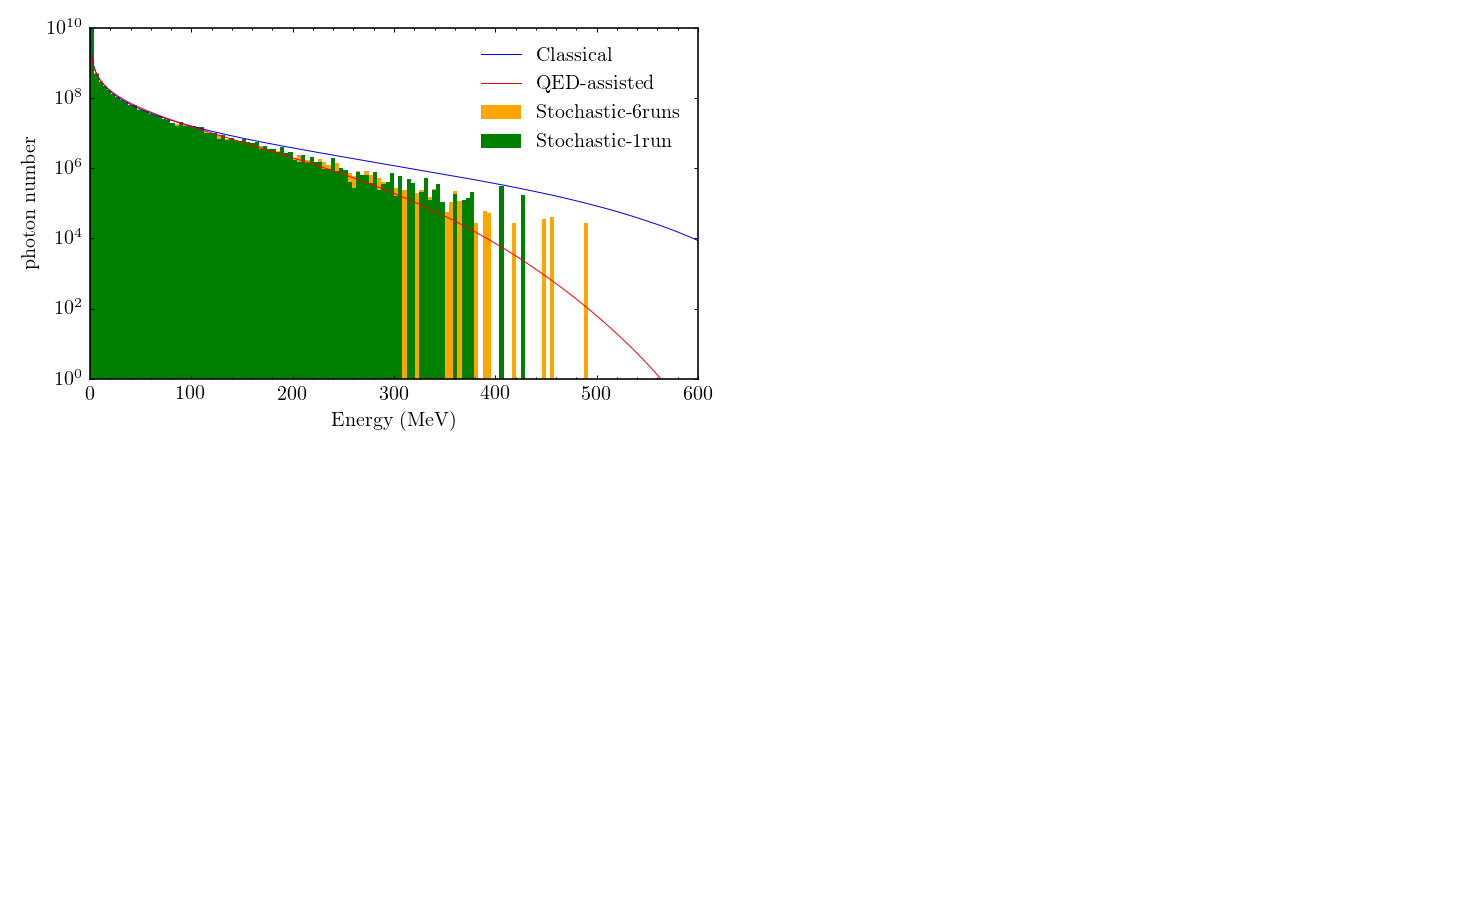

In [138]:
fig, ax1 = plt.subplots()

file1 = 3
file2 = 9
file3 = 15
ENE1,NUM1 = np.loadtxt(rf"{run_dir}/examples/Data3/phtne"
                       +str(file1).zfill(3)+".dat"
                       ,unpack=True,usecols=[0,1],dtype=np.float)
ENE2,NUM2 = np.loadtxt(rf"{run_dir}/examples/Data_test/phtne"
                       +str(file2).zfill(3)+".dat"
                       ,unpack=True,usecols=[0,1],dtype=np.float)
ENE3,NUM3 = np.loadtxt(rf"{run_dir}/examples/Data_test/dist_ph"
                       +str(file3).zfill(4)+".dat"
                       ,unpack=True,usecols=[0,1],dtype=np.float)
ENE4,NUM4 = np.loadtxt(rf"{run_dir}/examples/Data_test/dist_ph0011.dat"
                       ,unpack=True,usecols=[0,1],dtype=np.float)
ENE5,NUM5 = np.loadtxt(rf"{run_dir}/examples/Data_test/dist_ph0012.dat"
                       ,unpack=True,usecols=[0,1],dtype=np.float)
ENE6,NUM6 = np.loadtxt(rf"{run_dir}/examples/Data_test/dist_ph0013.dat"
                       ,unpack=True,usecols=[0,1],dtype=np.float)
ENE7,NUM7 = np.loadtxt(rf"{run_dir}/examples/Data_test/dist_ph0014.dat"
                       ,unpack=True,usecols=[0,1],dtype=np.float)
ENE8,NUM8 = np.loadtxt(rf"{run_dir}/examples/Data_test/dist_ph0015.dat"
                       ,unpack=True,usecols=[0,1],dtype=np.float)
ENE1 = ENE1*1e-6
ENE2 = ENE2*1e-6
ENE3 = ENE3*1e-6
ENE4 = ENE4*1e-6
ENE5 = ENE5*1e-6
NUM = (NUM4 + NUM3 + NUM5 + NUM6 + NUM7 + NUM8)/6

ax1.bar(ENE5,NUM,width=4.167,color='orange',label=r'Stochastic-6runs')
ax1.bar(ENE3,NUM8,width=4.167,color='green',label=r'Stochastic-1run')
ax1.plot(ENE1,NUM1,color='blue',label='Classical')
ax1.plot(ENE2,NUM2,color='red',label=r'QED-assisted')

ax1.set_xlabel("Energy (MeV)")
ax1.set_ylabel(r"$\mathrm{photon~number}$")
ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_xlim(xmin=0,xmax=600)
ax1.set_ylim(ymin=1,ymax=1e10)
ax1.minorticks_on()
ax1.legend(loc=1)
fig = plt.gcf()
fig.set_size_inches(fig_width*1.5,fig_width*1.5/1.618)
fig.tight_layout()
plt.show()

In [23]:
fig.savefig(rf"{run_dir}/docs/source/figures/photonnumber_beam.png"
            ,format='png',dpi=600,transparent=True
            ,bbox_inches='tight')

<IPython.core.display.Javascript object>


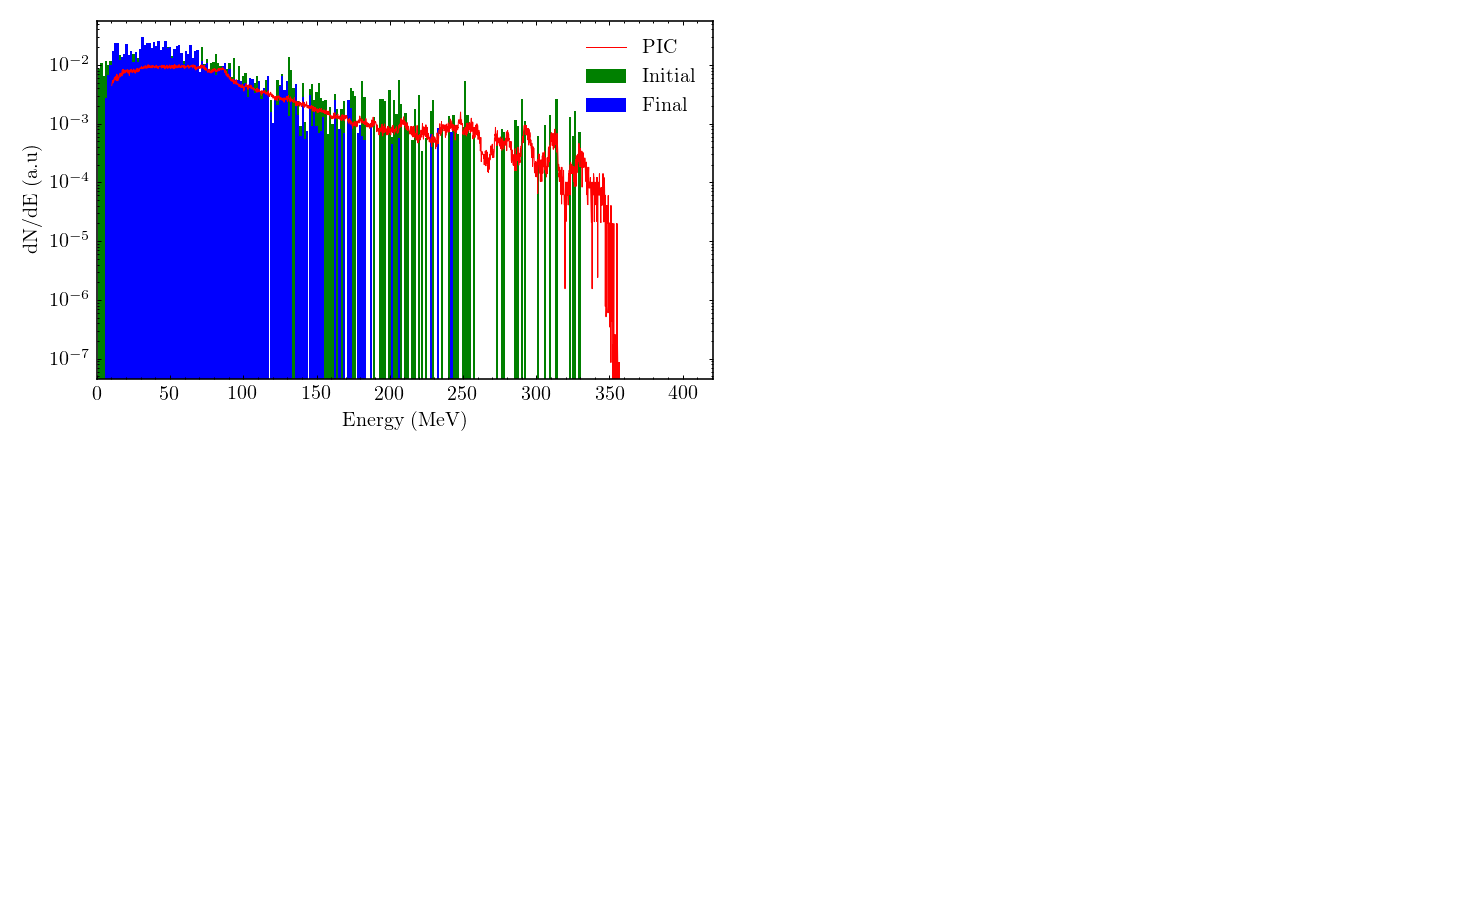

In [149]:
E0,dist_fn0 = np.loadtxt(rf"{run_dir}/examples/Data_test/dist_fn00000016.dat"
                         ,unpack=True,usecols=[0,1],dtype=np.float)
E1,dist_fn1 = np.loadtxt(rf"{run_dir}/examples/Data_test/dist_fn00100016.dat"
                         ,unpack=True,usecols=[0,1],dtype=np.float)
E2,dist_fn2 = np.loadtxt(rf"{run_dir}/examples/Data_test/load_particle.dat"
                         ,unpack=True,usecols=[0,1],dtype=np.float)
E0 = E0*1e-6
E1 = E1*1e-6
E2 = E2*1e-6

fig, ax1 = plt.subplots()
ax1.bar(E0,dist_fn0,width=1.56,color='green',label=r'Initial')
ax1.bar(E1,dist_fn1,width=1.56,color='blue',label=r'Final')
ax1.plot(E2,dist_fn2*1e2,color='red',label=r'PIC')
ax1.set_xlim(xmin=0)
#ax1.set_ylim(ymin=0)
ax1.set_xlabel("Energy (MeV)")
ax1.set_ylabel("dN/dE (a.u)")
ax1.minorticks_on()
ax1.legend()
ax1.set_yscale('log')
fig = plt.gcf()
fig.set_size_inches(fig_width*1.5,fig_width*1.5/1.618)
fig.tight_layout()
plt.show()

In [150]:
fig.savefig(rf"{run_dir}/docs/source/figures/load_beam.png"
            ,format='png',dpi=600,transparent=True
            ,bbox_inches='tight')